# <font color = 'lightgreen'><b>Classification</b></font>

In [1]:
# Classification : it is a process of categorizing a given set of data into classes or categories.
# Classification is a type of supervised learning.
# In classification, the idea is to categorize data into classes.
# The most common example of classification is email spam detection.
# The model is trained on a labelled dataset, which means it is trained on data that is already tagged with correct answers.
# The model is then tested on a new set of data that it hasn’t seen before.

---

## <font color = 'lightgreen'><b>Naive Bayes Classifier</b></font>

In [2]:
# Naive bayes classifier is a straightforward and powerful algorithm for the classification task.
# Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems.
# It is based on Bayes’ probability theorem.
# It is easy to build and particularly useful for very large data sets.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.datasets import make_blobs
# make_blobs is used to create a dataset of samples that are normally distributed.

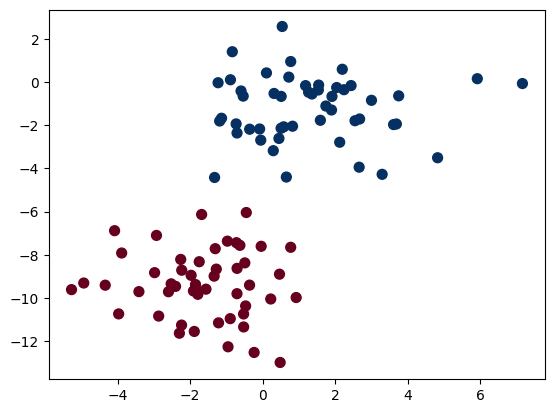

In [5]:
# Create a sample dataset
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [14]:
X

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691],
       [  1.90846569,  -0.6583068 ],
       [  2.99659881,  -0.83960814],
       [ -1.75036425,  -8.32495776],
       [  1.26386427,  -0.46380574],
       [ -2.92821038,  -7.10474478],
       [ -1.18679697,  -1.80057881],
       [ -0.70730261,  -8.6320622 ],
       [ -0.597949  ,  -0.40605237],
       [ -3.88704121,  -7.92023943],
       [ -0.49365731,  -8.378556  ],
       [ -0.97378999,  -7.371431  ],
       [  0.7183647 ,   0.23622995],
       [  1.355409  ,  -0.54741367],
       [ -0.47151448, -10.37571491],
       [ -0.95592795, -12.26939394],
       [ -2.5972638 ,  -9.71612662],
       [  0.44653092,  -2.60752136],
 

In [6]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [7]:
# Create a new data
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

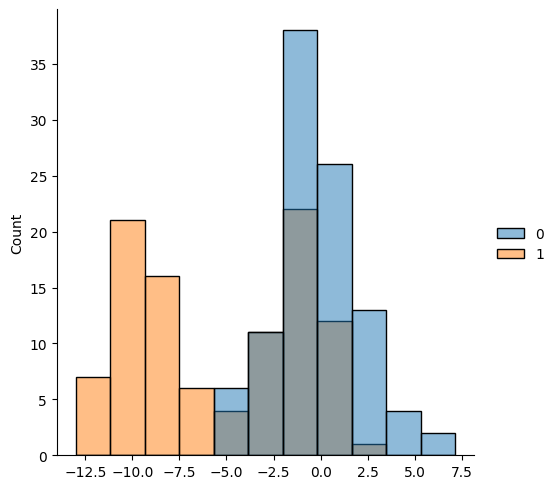

In [13]:
sns.displot(X)

In [9]:
Xnew

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       ...,
       [-4.32134532, -7.70649139],
       [ 0.08823081,  0.94005305],
       [ 7.05928655, -8.44990818]])

In [10]:
# accuracy_score(ynew, y) # cant be done as we didnt split the data, and we are predicting on new data

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

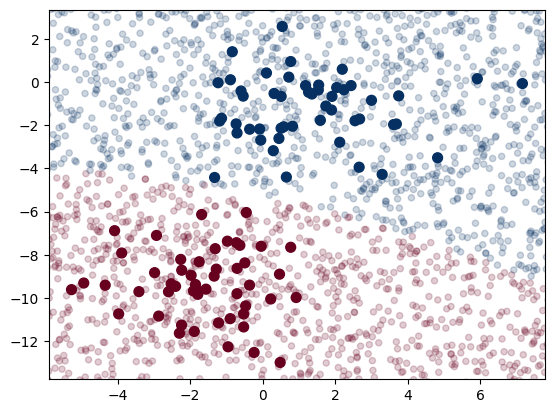

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis() # it will return current values of X, & y as aa tuple (xmin, xmax, ymin, ymax)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim)

---

## <font color = 'lightgreen'><b>Multinomial Naive Bayes</b></font>

In [15]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [16]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [18]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [21]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [22]:
labels = model.predict(test.data)

Text(77.92222222222226, 0.5, 'predicted label')

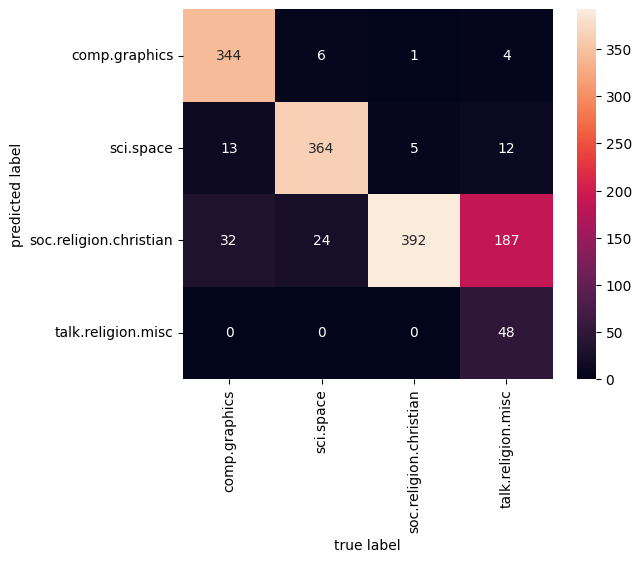

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot=True, fmt='d', cbar=True, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [24]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [25]:
predict_category('sending a payload to the ISS')

'sci.space'

In [26]:
predict_category('islam is the only true religion')

'soc.religion.christian'

In [27]:
predict_category('machine learning is a subset of data science')

'comp.graphics'

In [28]:
predict_category(
    'OpenGL on the GPU is fast'
)

'comp.graphics'